# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Explore the Training Dataset

In [2]:
# Load the training dataset
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

# Explore the training dataset
print(train_data.head())
print(train_data['is_fraud'].value_counts())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

# Exploratory Data Analysis (EDA)

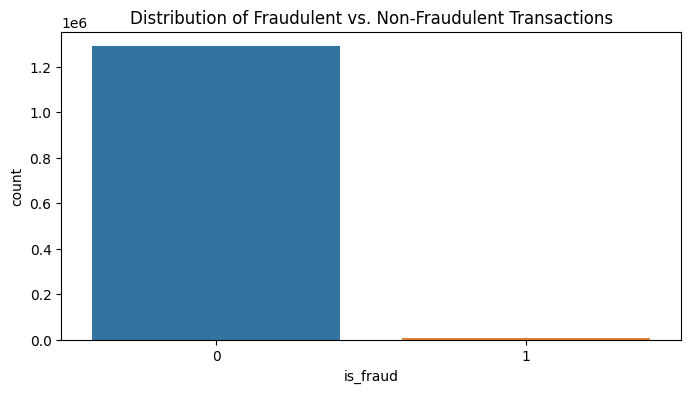

In [3]:
# Visualize the distribution of fraud vs. non-fraud transactions
plt.figure(figsize=(8, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


# Feature Engineering and Data Splitting

In [4]:
# Drop unnecessary columns
X = train_data.drop(['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender',
                     'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
y = train_data['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(train_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender',
                                                                  'street', 'city', 'state', 'job', 'dob', 'trans_num', 'is_fraud'], axis=1), 
                                                  train_data['is_fraud'], 
                                                  test_size=0.2, 
                                                  random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



# Train the Logistic Regression Model

In [5]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred_lr = lr_model.predict(X_val_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr))


Logistic Regression Model:
Accuracy: 0.993587444810766
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[257672    143]
 [  1520      0]]


# Train Decision Tree Model

In [6]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_val_pred_dt = dt_model.predict(X_val_scaled)
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))



Decision Tree Model:
Accuracy: 0.9929704821948445
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.41      0.46      0.43      1520

    accuracy                           0.99    259335
   macro avg       0.70      0.73      0.71    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[256816    999]
 [   824    696]]


# Load and Predict on Test Data using Decision Tree Model

In [7]:
# Step 8: Load and Predict on Test Data using Decision Tree Model
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Extract features used during scaling from the test data
X_test_features = test_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender',
                                   'street', 'city', 'state', 'job', 'dob', 'trans_num', 'is_fraud'], axis=1)

# Ensure column order is the same as in the training data
X_test_features = X_test_features[X_train.columns]

# Standardize numerical features
X_test_scaled = scaler.transform(X_test_features)

y_test_pred_dt = dt_model.predict(X_test_scaled)
test_data['PREDICTED_FRAUD'] = y_test_pred_dt
print(test_data[['Unnamed: 0', 'trans_num', 'PREDICTED_FRAUD']])


        Unnamed: 0                         trans_num  PREDICTED_FRAUD
0                0  2da90c7d74bd46a0caf3777415b3ebd3                0
1                1  324cc204407e99f51b0d6ca0055005e7                0
2                2  c81755dbbbea9d5c77f094348a7579be                0
3                3  2159175b9efe66dc301f149d3d5abf8c                0
4                4  57ff021bd3f328f8738bb535c302a31b                0
...            ...                               ...              ...
555714      555714  9b1f753c79894c9f4b71f04581835ada                0
555715      555715  2090647dac2c89a1d86c514c427f5b91                0
555716      555716  6c5b7c8add471975aa0fec023b2e8408                0
555717      555717  14392d723bb7737606b2700ac791b7aa                0
555718      555718  1765bb45b3aa3224b4cdcb6e7a96cee3                0

[555719 rows x 3 columns]
